# Stalk on yourself!
- #### Today we refresh our knowledge about dictionaries
- #### Learn how to read and write files 
- #### And we will parse your Facebook Timeline and visualize it!

## DICTIONARIES - reminder

* The best to think of a dictionary as an unordered set of `{key: value}` pairs, with the requirement that the keys are unique (within one dictionary).  
* The syntax for dictionaries is `{key1 : value1, ...}`
* Probably the most convinient data structure for social scientists (Think aaabout keys like variable names, and about values as the values of the variable)
* Values can be any type of data (int, str, list, tuples even dictionaries)
* Unlike sequences, which are indexed by a range of numbers, dictionaries are indexed by keys, which can be any immutable type; strings and numbers can always be keys. 
* Tuples can be used as keys if they contain only strings, numbers, or tuples; if a tuple contains any mutable object either directly or indirectly, it cannot be used as a key. 
* You can’t use lists as keys, since lists can be modified in place using index assignments, slice assignments, or methods like append() and extend().

<img src="dictionary.png" >

In [1]:
counts = {"bananas" : 1,
          "oranges" : 2,
          "apples" : 3,}

print(type(counts))
print(counts)

<type 'dict'>
{'bananas': 1, 'oranges': 2, 'apples': 3}


In [10]:
if 'bananas' in counts: print counts['bananas']
if 'strawberries' in counts: print counts['strawberries']
else: print "I don\'t know what a strawberry is"

1
I don't know what a strawberry is


In [13]:
counts.keys()

['bananas', 'oranges', 'apples']

In [14]:
counts.values()

[1, 2, 3]

In [15]:
#Iteration
for key in counts: 
    print key, counts[key]

bananas 1
oranges 2
apples 3


In [17]:
for value in counts.values():
    print value

1
2
3


In [22]:
# If you want both
for key,value in counts.items():
    print key,value

bananas 1
oranges 2
apples 3


In [23]:
for value in sorted(counts.values()):
    print value

1
2
3


## What kind of data types do we know so far? 

* str
* int
* float
* list
* tuple
* dictionary

Chossing the appropriate data type is a key in data analysis, especially during the cleaning/parsing part.

## READING AND WRITING FILES

In [25]:
cat example.txt #cat shows what is in the file

X	Y
bananas	3
apples	5
orange	none


In [26]:
f = open('example.txt')
print f

<open file 'example.txt', mode 'r' at 0x7f2ea4423660>


In [27]:
f.read()

'X\tY\nbananas\t3\napples\t5\norange\tnone\n'

In [28]:
f.close()

In [33]:
f = open('example.txt')
"""What do we see here?"""
f.readline()

'X\tY\n'

In [34]:
f.readline()

'bananas\t3\n'

In [35]:
f.readline()

'apples\t5\n'

In [36]:
f.close()

To read a file we have to iterate through all lines., if we want to read it.

In [37]:
f = open('example.txt')
for line in f: 
    print line
f.close()

X	Y

bananas	3

apples	5

orange	none



In [39]:
fout=open('writing.txt','w')
fout.write('This is a test\n')
fout.close()

In [40]:
cat writing.txt

This is a test


In [41]:
fout=open('another_writing.txt','w')
fout.write('This is a list of numbers\n')
for i in range(10):
    fout.write(str(i))
fout.close()

In [42]:
cat another_writing.txt

This is a list of numbers
0123456789

In [43]:
# Do not forget to add \n at the end of your lines
fout=open('another_writing.txt','w')
fout.write('This is a list of numbers\n')
for i in range(10):
    fout.write(str(i)+'\n')
fout.close()

In [44]:
cat another_writing.txt

This is a list of numbers
0
1
2
3
4
5
6
7
8
9


## Great! We know the basics of dictionaries and how to read and write files! So let's work with real data.

We will parse our Timeline data from Facebook, and plot how we accumulated friends over the years. It has the following steps:
0. Downloading your data from Facebook and unzip - DONE
1. Copy your my_facebook data to the same folder where your current jupyter notebook is or move there thrugh bash scripts
2. Choosing and reading the relevant file
3. Parsing it with Beutiful Soup (You have read the docs, haven't you?)
4. Creating a "database"
5. Plotting the results

Easy, right?

In [61]:
cd my_facebook/html

/home/orsi/Documents/ELTE/course_materials/Lecture3/my_facebook/html


In [68]:
with open('timeline.htm', 'r') as timeline_file:
    timeline_file = timeline_file.read()

In [69]:
len(timeline_file)

1128658

In [70]:
type(timeline_file)

str

In [74]:
from bs4 import BeautifulSoup, SoupStrainer, element
soup=BeautifulSoup(timeline_file, "lxml")

In [76]:
type(soup)

bs4.BeautifulSoup

In [250]:
print soup.prettify()[20000:21000]


     Friday, July 8, 2016 at 1:12am UTC+02
    </div>
    Orsi Vasarhelyi feeling free with Dorottya Vásárhelyi at Dune du Pyla.
    <div class="comment">
     #dune &lt;3
    </div>
    <p>
    </p>
    <div class="meta">
     Friday, July 8, 2016 at 12:08am UTC+02
    </div>
    Orsi Vasarhelyi and Tamás Boldizsár are now friends.
    <p>
    </p>
    <div class="meta">
     Friday, July 8, 2016 at 12:08am UTC+02
    </div>
    Orsi Vasarhelyi and Mate Toth are now friends.
    <p>
    </p>
    <div class="meta">
     Friday, July 8, 2016 at 12:08am UTC+02
    </div>
    Orsi Vasarhelyi and Eszter Szanka are now friends.
    <p>
    </p>
    <div class="meta">
     Friday, July 8, 2016 at 12:08am UTC+02
    </div>
    Orsi Vasarhelyi and Radnai András are now friends.
    <p>
    </p>
    <div class="meta">
     Friday, July 8, 2016 at 12:07am UTC+02
    </div>
    Orsi Vasarhelyi and Edina Dán are now friends.
    <p>
    </p>
    <div class="meta">
     Friday, July 8, 2016 at 12:

### Let's make our file smaller and find only the relevant information!

In [92]:
data=soup.find_all('div', class_="meta") 

In [77]:
type(data)

bs4.element.ResultSet

In [101]:
print data[0]

<div class="meta">Tuesday, August 2, 2016 at 12:13pm UTC+02</div>


Tags may contain strings and other tags. These elements are the tag’s children. Beautiful Soup provides a lot of different attributes for navigating and iterating over a tag’s children.

In [97]:
print list(data[0].children)

[u'Tuesday, August 2, 2016 at 12:13pm UTC+02']


You can use .next_sibling and .previous_sibling to navigate between page elements that are on the same level of the parse tree:

In [100]:
data[0].next_sibling 

u'Orsi Vasarhelyi likes Caf\xe9 Cometa.'

It is still a lot of useless informtion. We have to find the "are now friends" parts.

A string corresponds to a bit of text within a tag. Beautiful Soup uses the NavigableString class to contain these bits of text:



In [ ]:
tag.string
# u'Extremely bold'
type(tag.string)
# <class 'bs4.element.NavigableString'>


In [109]:
timeline_events=[]
for meta in data:
    event=meta.next_sibling #all events hich connects to a time   
    timeline_events.append(event)

In [112]:
len(timeline_events),timeline_events[:10]

(8280,
 [u'Orsi Vasarhelyi likes Caf\xe9 Cometa.',
  u"Orsi Vasarhelyi shared Bridge Budapest's photo.",
  u'Orsi Vasarhelyi is interested in The Biggest Beach Party in Barcelona - Music & Cookie Beach Party.',
  u'Orsi Vasarhelyi and Carolina Correa are now friends.',
  u'Orsi Vasarhelyi feeling excited at El Poble-sec, Barcelona.',
  u'Orsi Vasarhelyi is interested in Brunch -In the park #6: 10 Years of Aus: Will Saul, Paul Woolford, Jacques Greene y m\xe1s.',
  u'Orsi Vasarhelyi likes Brunch -In Barcelona.',
  u'Orsi Vasarhelyi and Alexandra Moln\xe1r are now friends.',
  u'Orsi Vasarhelyi likes Urban Dictionary.',
  u'Orsi Vasarhelyi was added to NO AGENCIES ROOMS BARCELONA by Mohamad Sinno.'])

We have the events, not just friendships, let's keep only the friendships and the name of the friend. How can we do that?
* need to keep only those which ends ' are now friends.'
* and the name of the person with whom we became friends

In [114]:
example=timeline_events[:10]

In [117]:
me='Orsi Vasarhelyi'
friends=[]
for event in example:
     if event[-(len(' are now friends.')):]==' are now friends.':
            friend=event[(int(len(' and ')+len(me))):(int(-len(' are now friends.')))]
            friends.append(friend)   

In [118]:
friends

[u'Carolina Correa', u'Alexandra Moln\xe1r']

Slicing looks very complicated

In [137]:
end=int(-len(' are now friends.')) #length of are friend
start_me=int(len(me)) #shows the place where the friends name comes

In [125]:
timeline_events=[]

for meta in data:
    event=meta.next_sibling #all events hich connects to a time   
    print event
    if event[-(len(' are now friends.')):]==' are now friends.':
        if event[:start_me]==me:
            friend=event[start_me:end]
            timeline_events.append({'friend':friend})

Orsi Vasarhelyi likes Café Cometa.
Orsi Vasarhelyi shared Bridge Budapest's photo.
Orsi Vasarhelyi is interested in The Biggest Beach Party in Barcelona - Music & Cookie Beach Party.
Orsi Vasarhelyi and Carolina Correa are now friends.
Orsi Vasarhelyi feeling excited at El Poble-sec, Barcelona.
Orsi Vasarhelyi is interested in Brunch -In the park #6: 10 Years of Aus: Will Saul, Paul Woolford, Jacques Greene y más.
Orsi Vasarhelyi likes Brunch -In Barcelona.
Orsi Vasarhelyi and Alexandra Molnár are now friends.
Orsi Vasarhelyi likes Urban Dictionary.
Orsi Vasarhelyi was added to NO AGENCIES ROOMS BARCELONA by Mohamad Sinno.
<div class="comment">Boldog Születésnapot! :)</div>


TypeError: unhashable type

#### So we have to add an other if, that it should start with `me` and make event a unicode() text

In [194]:
timeline_events=[]

for meta in data:
    event=meta.next_sibling #all events hich connects to a time   
    if unicode(event)[-(len(' are now friends.')):]==' are now friends.':
        if event[:start_me]==me:
            friend=event[start_me+len(' and '):end]
            timeline_events.append(friend)

In [195]:
print timeline_events[:10]

[u'Carolina Correa', u'Alexandra Moln\xe1r', u'Alifa Peherstorfer', u'Andr\xe1s Kreiss', u'Justyna Ka\u0142u\u017cka', u'Roy Bayot', u'Morvay Mikl\xf3s', u'Wim Glenn', u'Zs\xf3fia Cz\xe9m\xe1n', u'Alonso Lamas']


#### Great but it is very ugly, we should get rid of the wierd charachters, and the accents, here is a very nice function to do it

In [146]:
import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [192]:
timeline_events=[]

for meta in data:
    event=meta.next_sibling #all events hich connects to a time   
    if unicode(event)[-(len(' are now friends.')):]==' are now friends.':
        if event[:start_me]==me:
            friend=strip_accents(event[start_me+len(' and '):end])
            timeline_events.append(friend)

In [193]:
timeline_events[:10]

[u'Carolina Correa',
 u'Alexandra Molnar',
 u'Alifa Peherstorfer',
 u'Andras Kreiss',
 u'Justyna Ka\u0142uzka',
 u'Roy Bayot',
 u'Morvay Miklos',
 u'Wim Glenn',
 u'Zsofia Czeman',
 u'Alonso Lamas']

### Very nice, but I think we all know are friends, the more intersting part is to know where did you guys became friends.

In [157]:
for i in data[:10]:
    print i

<div class="meta">Tuesday, August 2, 2016 at 12:13pm UTC+02</div>
<div class="meta">Tuesday, August 2, 2016 at 9:09am UTC+02</div>
<div class="meta">Monday, August 1, 2016 at 12:34pm UTC+02</div>
<div class="meta">Monday, August 1, 2016 at 10:01am UTC+02</div>
<div class="meta">Sunday, July 31, 2016 at 4:04pm UTC+02</div>
<div class="meta">Sunday, July 31, 2016 at 12:41pm UTC+02</div>
<div class="meta">Sunday, July 31, 2016 at 12:41pm UTC+02</div>
<div class="meta">Friday, July 29, 2016 at 8:26am UTC+02</div>
<div class="meta">Thursday, July 28, 2016 at 4:52pm UTC+02</div>
<div class="meta">Thursday, July 28, 2016 at 11:40am UTC+02</div>


In [172]:
for i in data[:10]:
    print list(i.children)[0] #this is exactly the time we are looking for

Tuesday, August 2, 2016 at 12:13pm UTC+02
Tuesday, August 2, 2016 at 9:09am UTC+02
Monday, August 1, 2016 at 12:34pm UTC+02
Monday, August 1, 2016 at 10:01am UTC+02
Sunday, July 31, 2016 at 4:04pm UTC+02
Sunday, July 31, 2016 at 12:41pm UTC+02
Sunday, July 31, 2016 at 12:41pm UTC+02
Friday, July 29, 2016 at 8:26am UTC+02
Thursday, July 28, 2016 at 4:52pm UTC+02
Thursday, July 28, 2016 at 11:40am UTC+02


This is great, we easily got the eaxact timestamps , but still in a `<class 'bs4.element.NavigableString'> ` format and we need in `datetime` format.

### What is datetime?

The [datetime](https://docs.python.org/2/library/datetime.html) module supplies classes for manipulating dates and times in both simple and complex ways. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation. For related functionality, see also the time and calendar modules. Other modules requires datetimeformats for plotting. It makes much easier to claculate with datess, (eg.: difference between two dates instances)


`classmethod datetime.strptime(date_string, format)`
Conversely, the datetime.strptime() class method creates a datetime object from a string representing a date and time and a corresponding format string. datetime.strptime(date_string, format) is equivalent to datetime(*(time.strptime(date_string, format)[0:6])).

### We have to create a format! Translate the following forms, absed on the Documentation:

In [166]:
form1='%A, %B %d, %Y at %I:%M%p'
form2='%B %d, %Y'

In [171]:
import datetime
times=[]
for i in data[:10]:
    time_string=list(i.children)[0]
    time=datetime.datetime.strptime(time_string[:-7], form1)
    times.append(time)
print times 

[datetime.datetime(2016, 8, 2, 12, 13), datetime.datetime(2016, 8, 2, 9, 9), datetime.datetime(2016, 8, 1, 12, 34), datetime.datetime(2016, 8, 1, 10, 1), datetime.datetime(2016, 7, 31, 16, 4), datetime.datetime(2016, 7, 31, 12, 41), datetime.datetime(2016, 7, 31, 12, 41), datetime.datetime(2016, 7, 29, 8, 26), datetime.datetime(2016, 7, 28, 16, 52), datetime.datetime(2016, 7, 28, 11, 40)]


### What happens if we use form2?

Hint: we had this one: Tuesday, August 2, 2016 at 12:13pm UTC+02

## Let's hack time and friends together!

In [206]:
timeline_events=[]


for meta in data:
    time_string=list(meta.children)[0]
    time=datetime.datetime.strptime(time_string[:-7], form1)
    event=meta.next_sibling #all events hich connects to a time   
    if unicode(event)[-(len(' are now friends.')):]==' are now friends.':
        if event[:start_me]==me:
            friend=strip_accents(event[start_me+len(' and '):end])
            timeline_events.append({'time':time, 'friend':friend}) #What kind of data structure do we need?

In [207]:
timeline_events[:10]

[{'friend': u'Carolina Correa', 'time': datetime.datetime(2016, 8, 1, 10, 1)},
 {'friend': u'Alexandra Molnar',
  'time': datetime.datetime(2016, 7, 29, 8, 26)},
 {'friend': u'Alifa Peherstorfer',
  'time': datetime.datetime(2016, 7, 22, 23, 10)},
 {'friend': u'Andras Kreiss', 'time': datetime.datetime(2016, 7, 22, 1, 40)},
 {'friend': u'Justyna Ka\u0142uzka',
  'time': datetime.datetime(2016, 7, 22, 1, 20)},
 {'friend': u'Roy Bayot', 'time': datetime.datetime(2016, 7, 20, 13, 1)},
 {'friend': u'Morvay Miklos', 'time': datetime.datetime(2016, 7, 20, 13, 1)},
 {'friend': u'Wim Glenn', 'time': datetime.datetime(2016, 7, 20, 13, 1)},
 {'friend': u'Zsofia Czeman', 'time': datetime.datetime(2016, 7, 15, 11, 40)},
 {'friend': u'Alonso Lamas', 'time': datetime.datetime(2016, 7, 14, 19, 1)}]

### Let's create an other data type, where we can actually look for the date when we got friends on Facebook absed on names!

 class collections.defaultdict([default_factory[, ...]])

    Returns a new dictionary-like object. defaultdict is a subclass of the built-in dict class. It overrides one method and adds one writable instance variable. The remaining functionality is the same as for the dict class and is not documented here.

In [183]:
from collections import defaultdict 

In [204]:
friends_dict=defaultdict(datetime.datetime)


for meta in data:
    time_string=list(meta.children)[0]
    time=datetime.datetime.strptime(time_string[:-7], form1)
    event=meta.next_sibling #all events hich connects to a time   
    if unicode(event)[-(len(' are now friends.')):]==' are now friends.':
        if event[:start_me]==me:
            friend=strip_accents(event[start_me+len(' and '):end])
            friends_dict[friend]=time #What kind of data structure do we need?

In [205]:
friends_dict['Daniel Nagy']

datetime.datetime(2009, 2, 22, 17, 12)

Here is my original code, it is tested, works with two user names, and ready to handle all problems:

In [181]:
me2='Orsolya Vasarhelyi'
start_me2=start_me2=len(me2)

timeline_events=[]
for i in data:
    time_string=list(i.children)[0]
    if '(Displayed as' in time_string:
        time_string=time_string.split(" (", 1)[0]
    time=datetime.datetime.strptime(time_string[:-7],form1)
    event=i.next_sibling
    if isinstance(event, element.NavigableString):
        if event[-(len(' are now friends.')):]==' are now friends.':
            if event[:start_me]==me:
                friend=strip_accents(event[start_me:end])
            else:
                friend=strip_accents(event[start_me2:end])
            timeline_events.append({'time':time, 'event':event, 'friend':friend})

## Lets see what we have! 

We will plot two different different charts.
1. A commulative distribution to see the trends of friendship
2. And a chart which shows in which day how many new freids you gained

### How many friends we have right now?

In [212]:
print ' this is the number of friend: '+str(len(friends_dict.keys()))

 this is the number of friend: 537


### Write a function which calculates for how long have you been friends with each frirend!
Hint: read about how to calculate time dfferences with datetime objects and what does td.days do in the [datetime documenation](https://docs.python.org/2/library/datetime.html)

In [239]:
#Helper function:
def days_hours_minutes(td):
    return td.days


def friendship_by_days(events):
    friends_by_time=defaultdict(int)
    for event in events:
        friends_by_time[event['friend']]=days_hours_minutes(datetime.date.today()-event['time'].date())
    return friends_by_time
    

In [236]:
#friendship_by_days(timeline_events)

In [226]:
getting_friends=[]
for event in timeline_events:
    getting_friends.append(event['time'])
getting_friends.sort()
print getting_friends[0], getting_friends[-1]
number_of_friends=range(1, len(getting_friends)+1) #Why ca we do like this?

2008-11-17 11:40:00 2016-08-01 10:01:00


In [ ]:
from matplotlib.dates import date2num , DateFormatter
import matplotlib.pyplot as plt
%matplotlib inline

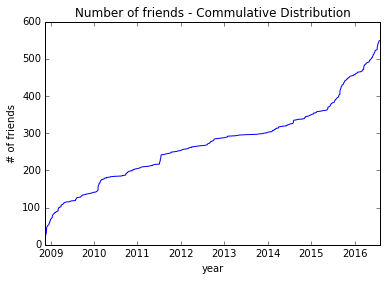

In [230]:
plt.plot(getting_friends, number_of_friends)
plt.title('Number of friends - Commulative Distribution')
plt.xlabel('year')
plt.ylabel('# of friends')
plt.show()

In [240]:
getting_friends_by_date=[]
for new_friend in getting_friends:
    getting_friends_by_date.append(new_friend.date())
print getting_friends_by_date[0], getting_friends_by_date[-1]

2008-11-17 2016-08-01


In [242]:
from collections import Counter #Aggregates ists into a dictionary, where key is the list element and the value is the number of time sit was found
aggregated_friends_by_dates=Counter(getting_friends_by_date)

In [246]:
#aggregated_friends_by_dates

In [247]:
to_plot=[]
for date, freq in aggregated_friends_by_dates.iteritems():
    to_plot.append((date, freq))
to_plot.sort()
print to_plot[0], to_plot[-1]   

(datetime.date(2008, 11, 17), 20) (datetime.date(2016, 8, 1), 1)


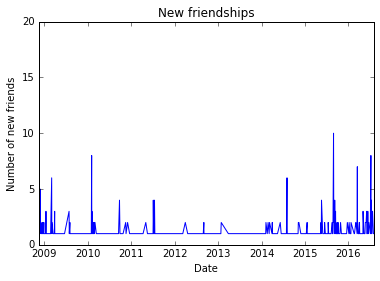

In [249]:
x=[]
y=[]
for i in to_plot:
    x.append(i[0])
    y.append(i[1])
plt.plot(x, y)
plt.title('New friendships')
plt.xlabel('Date')
plt.ylabel('Number of new friends')
plt.show()

## Great job! We maneged to stalk on ourselves, let's see what we gained today:
* Refreshed `dictionaries`
* Lernt how to read and write files
* Learned about the following new modules: Beutiful Soup, Collections (Counter, defaultdict), DateTime, unicodedata
* We parsed our Facebook Timeline and found when we became friends with current friends
* Created hanfy dictionaries to see when did you get friends
* Plotted with matplotib (which we will we learn about much more next time)

## Homework
* For the next class, please read about [Matplotlib](http://matplotlib.org/index.html) and [Bokeh](http://bokeh.pydata.org/en/latest/)


